In [17]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### DATA CLEANING

In [18]:
class data(object):
    def __init__(self,file,csv_indicator):
        self.file = file
        self.csv_indicator = csv_indicator
        self._load_data()
        
    def _load_data(self):
        if self.csv_indicator==1:
            self.df = pd.read_csv(self.file,skiprows=1).drop('ID',1)
        else:
            self.df = pd.read_excel(self.file,skiprows=1).drop('ID',1)
        
    #column X3 or education should only have values 1-4. 
    #take out the 5,6,7 values that show up
    #what should our methodology be for replacing these values?
    #random selection?  Ask Tao what we should do with these values.
    #i think randomly selecting a value (1-4) based on actual distribution of column makes sense
    #to do this calculate length of distribution w/ acceptable values
    #generate random number inside length of that distribution
    #index acceptable values by random number you generated
    def _fix_education_values(self):
        def replace_values(x):
            if x > 4:
                return 4
            else:
                return x
            
        self.df['EDUCATION'] = [replace_values(x) for x in self.df.EDUCATION]
        
    
    #should have 1 (married),2 (single),3 (others)
    #replace all 0's with 3 as they will fall under the category "others"
    def _fix_marital_status(self):
        def fix_numbers(x):
            if x == 0:
                return 3
            else:
                return x
        self.df['MARRIAGE'] = [fix_numbers(x) for x in self.df.MARRIAGE]
       
        
    def _fix_late_pay_status(self,include_columns):
        for column in include_columns:
            def max_(x):
                return max(x,0)
            self.df[column] = [max_(x) for x in self.df[column]]
        #columns 6-11
        #anything negative should be switched to 0. This indicates they have paid on time and in some cases two months early.
        #columns 12-17
        #this could also be used on these columns. Anything negative indicates they have overpayed. Turn the columns into...
        #...money due so replace all negative values.
        
    def _fix_outliers(self,exclude_columns=None):
        def get_outliers(self,value,lower,upper):
            if value >= upper + 1.5*upper:
                return upper
            elif value <= lower - 1.5*lower:
                return lower
            else:
                return value
    
        if exclude_columns==None:
            unique_cols = self.df.columns
        else:
            unique_cols = self.df.columns.drop(exclude_columns,1)
        for i in unique_cols:
            lower = self.df[i].quantile(0.225)
            upper = self.df[i].quantile(0.775)
            self.df[i]= [get_outliers(self,value,lower,upper) 
                         for value,lower,upper in 
                         zip(self.df[i],
                             [lower for x in range(0,len(self.df))],
                             [upper for y in range(0,len(self.df))]
                            )
                        ]
            
    
    #def _normalize_stuff(self,exclude_columns=None):
        #how do we make up a set of rules that checks for skewness and applies a certain function to the distribution
        #if that skewness still isn't within acceptable bounds try different function
    
    #scale all the columns (0-1)
    def _scale_stuff(self,exclude_columns=None):
        from sklearn.preprocessing import MinMaxScaler
        min_max_scaler = MinMaxScaler()
        if exclude_columns==None:
            unique_cols = self.df.columns
        else:
            unique_cols = self.df.columns.drop(exclude_columns,1)
        
        for col in unique_cols:
            self.df[col] = pd.Series(min_max_scaler.fit_transform(np.array(self.df[col]).reshape(-1,1)).reshape(1,len(self.df[col]))[0])
            
    def _calculate_z_scores(self,exclude_columns=None):
        if exclude_columns== None:
            unique_cols = self.df.columns
        else:
            unique_cols = self.df.columns.drop(exclude_columns,1)
        for col in unique_cols:
            self.df[col] = (self.df[col] - self.df[col].mean())/self.df[col].std(ddof=0)
    
    def _one_hot_encode(self,include_columns=None):
        if include_columns == None:
            print('pass the list of columns you want to one hot encode')
        else:
            self.df = pd.get_dummies(self.df, prefix_sep="__",
                              columns=include_columns)
            
        #when new data production data is introduced drop anything not in column_list
        column_list = self.df.columns
        
    #def _calculate_x_features():
        
    #def _calculate_target_variables():
        
    #def _bin_column_values(column_name)
        

### Data_Pipelines

In [19]:
#NORMAL WORK FLOW EXAMPLE BELOW
##PIPELINE 1

#include_columns = [Columns X6-X11]  
include_columns = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
#include_columns1 = [Columns X12-X17]
include_columns1 = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
#categorical = [Categorical Columns]
categorical = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']

#initialize object
F = data('default_of_credit_card_clients.xlsx',0)

#fix known bad stuff, maybe call these in the initialize function so you don't have to explicitly call them
F._fix_marital_status()
F._fix_late_pay_status(include_columns)
F._fix_late_pay_status(include_columns1)
F._fix_education_values() 
       
    
#THEN IN ANY ORDER, TRY DIFFERENT ORDERS OUT TO SEE WHAT WORKS BEST
F._fix_outliers(categorical)
#F._normalize_stuff(categorical)
F._scale_stuff(categorical)
F._calculate_z_scores(categorical)
F._one_hot_encode(['SEX','EDUCATION','MARRIAGE'])

#use above datdaframe to then test which order produces best modeling performance
#take modeling code from evaluation code in competition1 (xgboost model)

### XGBoost



  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

 10%|████████▎                                                                          | 1/10 [00:09<01:24,  9.37s/it]

 20%|████████████████▌                                                                  | 2/10 [00:18<01:13,  9.19s/it]

 30%|████████████████████████▉                                                          | 3/10 [00:26<01:02,  8.92s/it]

 40%|█████████████████████████████████▏                                                 | 4/10 [00:35<00:54,  9.01s/it]

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:44<00:45,  9.06s/it]

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:53<00:35,  8.97s/it]

 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:03<00:27,  9.25s/it]

 80%|█████████████████████████

[0.8171666666666667, 0.8098333333333333, 0.8076666666666666, 0.819, 0.8053333333333333, 0.8118333333333333, 0.8035, 0.8058333333333333, 0.8121666666666667, 0.802]

Accuracy 0.8094333333333333

[0.5186485300570426, 0.5041286397218601, 0.5097706032285472, 0.5169039145907474, 0.5025553662691652, 0.5139905294877314, 0.5060745705906996, 0.49369839200347676, 0.517757809157039, 0.4910025706940874]

F1 0.5074530925800397


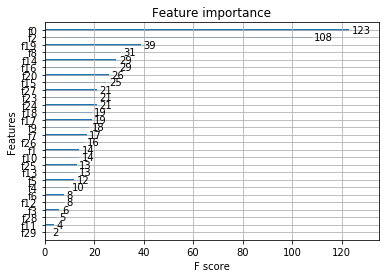

In [21]:
y = F.df['default payment next month']
X = F.df.drop('default payment next month',1)
#y = H.df['default payment next month']
#X = H.df.drop('default payment next month',1)

from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt 
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE

scores = []
f1 = []
count=0
for i in tqdm(range(0,10)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train = X_train.as_matrix()
    X_test = X_test.as_matrix()
    y_train = y_train.as_matrix()
    y_test = y_test.as_matrix()
    model = XGBClassifier(learning_rate = 0.1,
                      n_estimators=100,
                      max_depth=3,
                      min_child_weight=3,
                      gamma=1.0,
                      reg_alpha=0.05,
                      colsample_bytree=1.0,
                      objective='binary:logistic',
                      scal_pos_weight=1,
                      seed=27)

    #Oversample data since it's imbalanced
    sm=SMOTE(random_state=i,ratio=1.0)
    x_train_res, y_train_res=sm.fit_sample(X_train, y_train)
    
    model.fit(x_train_res,y_train_res)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
        
    f1_score_ = f1_score(y_test,y_pred)
    f1.append(f1_score_)

print(scores)
print('')
print('Accuracy' + ' ' + str(np.mean(scores)))
print('')
print(f1)
print('')
print('F1' + ' ' + str(np.mean(f1)))
#H has avg accuracy of .8229


#only 20% of people defaulted.
#If we guessed "not default" everytime we'd be about 80% correct so the above results actually kind of suck
1-sum(F.df['default payment next month'])/len(F.df['default payment next month'])
plot_importance(model)

In [30]:
column_dict = {}
for i in range(0,len(F.df.columns)):
    column_dict.update({'f{}'.format(i):F.df.columns[i]})
    
column_dict

{'f0': 'LIMIT_BAL',
 'f1': 'AGE',
 'f10': 'BILL_AMT3',
 'f11': 'BILL_AMT4',
 'f12': 'BILL_AMT5',
 'f13': 'BILL_AMT6',
 'f14': 'PAY_AMT1',
 'f15': 'PAY_AMT2',
 'f16': 'PAY_AMT3',
 'f17': 'PAY_AMT4',
 'f18': 'PAY_AMT5',
 'f19': 'PAY_AMT6',
 'f2': 'PAY_0',
 'f20': 'default payment next month',
 'f21': 'SEX__1',
 'f22': 'SEX__2',
 'f23': 'EDUCATION__0',
 'f24': 'EDUCATION__1',
 'f25': 'EDUCATION__2',
 'f26': 'EDUCATION__3',
 'f27': 'EDUCATION__4',
 'f28': 'MARRIAGE__1',
 'f29': 'MARRIAGE__2',
 'f3': 'PAY_2',
 'f30': 'MARRIAGE__3',
 'f4': 'PAY_3',
 'f5': 'PAY_4',
 'f6': 'PAY_5',
 'f7': 'PAY_6',
 'f8': 'BILL_AMT1',
 'f9': 'BILL_AMT2'}

In [23]:
###PIPELINE 2
##PIPELINE 1

#include_columns = [Columns X6-X11]  
include_columns = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
#include_columns1 = [Columns X12-X17]
include_columns1 = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
#categorical = [Categorical Columns]
categorical = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']

#initialize object
H = data('default_of_credit_card_clients.xlsx',0)

#fix known bad stuff, maybe call these in the initialize function
H._fix_marital_status()
H._fix_late_pay_status(include_columns)
H._fix_late_pay_status(include_columns1)
H._fix_education_values() 
       
    
#THEN IN ANY ORDER, TRY DIFFERENT ORDERS OUT TO SEE WHAT WORKS BEST
#H._fix_outliers(categorical)
#F._normalize_stuff(categorical)
#H._scale_stuff(categorical)
#H._calculate_z_scores(categorical)
H._one_hot_encode(['SEX','EDUCATION','MARRIAGE'])

#use above datdaframe to then test which order produces best modeling performance
#take modeling code from evaluation code in competition1 (xgboost model)



  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

 10%|████████▎                                                                          | 1/10 [00:08<01:13,  8.20s/it]

 20%|████████████████▌                                                                  | 2/10 [00:17<01:08,  8.55s/it]

 30%|████████████████████████▉                                                          | 3/10 [00:27<01:03,  9.11s/it]

 40%|█████████████████████████████████▏                                                 | 4/10 [00:38<00:58,  9.68s/it]

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:47<00:47,  9.47s/it]

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:56<00:37,  9.31s/it]

 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:06<00:28,  9.42s/it]

 80%|█████████████████████████

[0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802, 0.802]

Accuracy 0.8019999999999999
 
[0.4910025706940874, 0.4910025706940874, 0.4910025706940874, 0.4910025706940874, 0.4910025706940874, 0.4910025706940874, 0.4910025706940874, 0.4910025706940874, 0.4910025706940874, 0.4910025706940874]

F1 0.49100257069408737


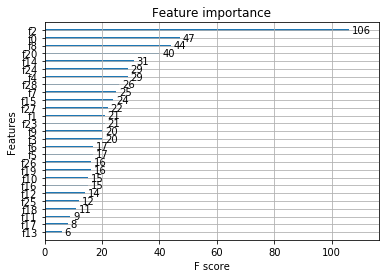

In [25]:
#y = F.df['default payment next month']
#X = F.df.drop('default payment next month',1)
y1 = H.df['default payment next month']
X1 = H.df.drop('default payment next month',1)

from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 
from xgboost import plot_importance

scores1 = []
f1_1 = []
count=0
for i in tqdm(range(0,10)):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=i)
    X_train1 = X_train1.as_matrix()
    X_test1 = X_test1.as_matrix()
    y_train1 = y_train1.as_matrix()
    y_test1 = y_test1.as_matrix()
    
    model1 = XGBClassifier(learning_rate = 0.1,
                      n_estimators=100,
                      max_depth=3,
                      min_child_weight=3,
                      gamma=1.0,
                      reg_alpha=0.05,
                      colsample_bytree=1.0,
                      objective='binary:logistic',
                      scal_pos_weight=1,
                      seed=27)
    
    #Oversample data since it's imbalanced
    sm=SMOTE(random_state=i,ratio=1.0)
    x_train_res1, y_train_res1=sm.fit_sample(X_train1, y_train1)

    model1.fit(x_train_res1,y_train_res1)
    y_pred1 = model1.predict(X_test1)

    
    accuracy = accuracy_score(y_test, y_pred)
    scores1.append(accuracy)
        
    f1_score_ = f1_score(y_test,y_pred)
    f1_1.append(f1_score_)

print(scores1)
print('')
print('Accuracy' + ' ' + str(np.mean(scores1)))
print(' ')
print(f1_1)
print('')
print('F1' + ' ' + str(np.mean(f1_1)))
#H has avg accuracy of .8229

#only 20% of people defaulted.
#If we guessed "not default" everytime we'd be about 80% correct so the above results actually kind of suck
1-sum(F.df['default payment next month'])/len(F.df['default payment next month'])
plot_importance(model1)


### RandomForest

In [31]:
column_dict

{'f0': 'LIMIT_BAL',
 'f1': 'AGE',
 'f10': 'BILL_AMT3',
 'f11': 'BILL_AMT4',
 'f12': 'BILL_AMT5',
 'f13': 'BILL_AMT6',
 'f14': 'PAY_AMT1',
 'f15': 'PAY_AMT2',
 'f16': 'PAY_AMT3',
 'f17': 'PAY_AMT4',
 'f18': 'PAY_AMT5',
 'f19': 'PAY_AMT6',
 'f2': 'PAY_0',
 'f20': 'default payment next month',
 'f21': 'SEX__1',
 'f22': 'SEX__2',
 'f23': 'EDUCATION__0',
 'f24': 'EDUCATION__1',
 'f25': 'EDUCATION__2',
 'f26': 'EDUCATION__3',
 'f27': 'EDUCATION__4',
 'f28': 'MARRIAGE__1',
 'f29': 'MARRIAGE__2',
 'f3': 'PAY_2',
 'f30': 'MARRIAGE__3',
 'f4': 'PAY_3',
 'f5': 'PAY_4',
 'f6': 'PAY_5',
 'f7': 'PAY_6',
 'f8': 'BILL_AMT1',
 'f9': 'BILL_AMT2'}

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

#Oversample data since it's imbalanced
sm=SMOTE(random_state=i,ratio=1.0)
x_train_res, y_train_res=sm.fit_sample(X_train, y_train)

clf.fit(x_train_res,y_train_res)
y_pred = clf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
f1_score2 = f1_score(y_test,y_pred)
print(accuracy2)
print('')
print(f1_score2)
print('')

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("{}. feature {} ({})".format(X_train.columns[indices[f]],indices[f],importances[indices[f]]))

0.7713333333333333

0.5192711983181499

PAY_0. feature 2 (0.2932693320901362)
PAY_2. feature 3 (0.16727145910309635)
PAY_5. feature 6 (0.1039009565784621)
PAY_3. feature 4 (0.08268890490246945)
PAY_4. feature 5 (0.08237414333289857)
PAY_6. feature 7 (0.07074793164002441)
LIMIT_BAL. feature 0 (0.04262595488968012)
PAY_AMT1. feature 14 (0.03849148909083325)
PAY_AMT2. feature 15 (0.022848278197803946)
PAY_AMT3. feature 16 (0.022810032039526508)
PAY_AMT4. feature 17 (0.012341406043145335)
PAY_AMT6. feature 19 (0.011698912896468804)
PAY_AMT5. feature 18 (0.009663218673610507)
MARRIAGE__1. feature 27 (0.007932848865820519)
EDUCATION__2. feature 24 (0.0076561910689367865)
EDUCATION__1. feature 23 (0.006867744763264349)
BILL_AMT4. feature 11 (0.004833560893764077)
SEX__1. feature 20 (0.0032830831548041517)
BILL_AMT2. feature 9 (0.00247771253496277)
BILL_AMT3. feature 10 (0.0012874112882670732)
BILL_AMT1. feature 8 (0.0011171858921205653)
EDUCATION__4. feature 26 (0.0010461166600935726)
MARRIAG

### GridSearch

In [ ]:
from sklearn.grid_search import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
param_test1 = {
               'max_depth':[3,7,10],
               'min_child_weight':[1,3,6],
               'gamma':[0,0.5,1.0],
               'colsample_bytree':[0,0.5,1.0],
               'reg_alpha':[0,0.005,0.01,0.05]
              }
#param_test1 = {'max_depth':[10],'min_child_weight':[1],'reg_alpha':[0.05],'gamma':[0.5],'colsample_bytree':[1]}
gsearch1 = GridSearchCV(estimator = model,param_grid = param_test1,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_